## Basic demonstration of sansmic
The following examples show a withdrawal of 1 MMbbl from an approx. 10 MMbbl cavern over 10 days, followed by a 45 day rest period. The first example shows how to load and run from an existing DAT-format file. The second example shows how to build the same scenario from scratch.

### Setup
After installing sansmic, import the ``sansmic`` module. If you need other packages, import them as well.

In [1]:
import sansmic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Using an existing SANSMIC DAT file

If you have an existing file, such as the provided example called ``old.dat``, then you can just read it in to create a new scenario object. You can look at the object in dictionary format to see how it was imported.

In [2]:
test1scen = sansmic.io.read_scenario('old.dat')
test1scen.to_dict()

{'title': 'Converted from old.dat',
 'num-cells': 200,
 'geometry-data': {'radii': [50.0,
   90.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
   100.0,
 

To run the simulation in batch mode, simply create a new simulation and then run it. The results are stored in the ``results`` attribute of the simulation object.

In [3]:
with test1scen.new_simulation('converted') as sim1:
    sim1.run_sim()
test1results = sim1.results

<Axes: >

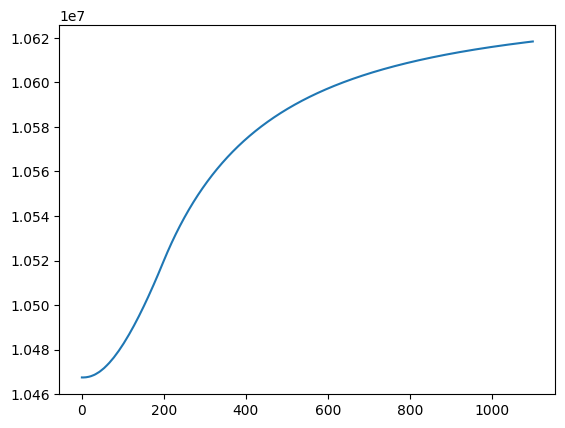

In [4]:
test1results.summary.V_cav.plot()

In [5]:
test2scen = sansmic.Scenario(
    title="Simple example",
    cavern_height=2000.0,  # z-domain = [0, 1000] ft
    floor_depth=4000.0,    # TD = 4000 ft MD
    num_cells=200,         # 200 cells (10 ft high)
)
test2scen.insolubles_ratio = 0.04
test2scen.geometry_format = sansmic.model.GeometryFormat.RADIUS_LIST
radii = np.array([100]*201)  # 100 ft radius for the bulk of the cavern
radii[0] = 50
radii[1] = 90
radii[187] = 88
radii[188] = 45
radii[189] = 15
radii[190] = 8
radii[191] = 5
radii[192:] = 2
test2scen.geometry_data = dict(radii=radii.tolist())

In [6]:
stage1 = test2scen.new_stage()

Now we setup up the simulation stage. Note - in this example we will set up a timestep that is ten times larger (0.1 h) than the old data file so that we can see the differences, if any.

In [7]:
stage1.title = "Found a bug - have to have a title?"
stage1.simulation_mode = 'withdrawal'
stage1.brine_injection_sg = 1.003     # sg
stage1.brine_injection_rate = 100000  # bbl/d
stage1.brine_injection_depth = 15  # ft MD
stage1.brine_interface_depth = 37   # ft MD
stage1.injection_duration = 240       # h
stage1.rest_duration = 1080           # h
stage1.inner_tbg_inside_diam = 9.8    # in
stage1.inner_tbg_outside_diam = 10.75 # in
stage1.outer_csg_inside_diam = 12.25  # in
stage1.outer_csg_outside_diam = 13.375 # in
stage1.set_cavern_sg = 1.2019         # starting cavern SG
stage1.solver_timestep = 0.1          # h
stage1.save_frequency = 120           # timesteps (120 ts x 0.1 h/ts = 12 h)

In [8]:
with test2scen.new_simulation('temp', verbosity=1) as sim2:
    print("""|    |   t_d |   V_inj |       V_cav |   sg_ave |""")
    for stage, step in sim2.steps:
        if step % 1200 == 0:
            res = sim2.get_current_state()
            print(res.summary.loc[:,['t_d', 'V_inj', 'V_cav', 'sg_ave']].to_markdown(headers=[]))
test2results = sim2.results

|    |   t_d |   V_inj |       V_cav |   sg_ave |
|--:|--:|-------:|------------:|--------:|
| 0 | 5 | 500000 | 1.04822e+07 | 1.08309 |
|--:|---:|------:|----------:|--------:|
| 0 | 10 | 1e+06 | 1.052e+07 | 1.09335 |
|--:|---:|------:|-----------:|--------:|
| 0 | 15 | 1e+06 | 1.0554e+07 | 1.12954 |
|--:|---:|------:|------------:|--------:|
| 0 | 20 | 1e+06 | 1.05745e+07 | 1.15016 |
|--:|---:|------:|-----------:|--------:|
| 0 | 25 | 1e+06 | 1.0588e+07 | 1.16315 |
|--:|---:|------:|------------:|--------:|
| 0 | 30 | 1e+06 | 1.05973e+07 | 1.17191 |
|--:|---:|------:|-----------:|--------:|
| 0 | 35 | 1e+06 | 1.0604e+07 | 1.17814 |
|--:|---:|------:|-----------:|--------:|
| 0 | 40 | 1e+06 | 1.0609e+07 | 1.18271 |
|--:|---:|------:|------------:|--------:|
| 0 | 45 | 1e+06 | 1.06129e+07 | 1.18618 |
|--:|---:|------:|-----------:|--------:|
| 0 | 50 | 1e+06 | 1.0616e+07 | 1.18889 |
|--:|---:|------:|------------:|--------:|
| 0 | 55 | 1e+06 | 1.06184e+07 | 1.19104 |


<Axes: >

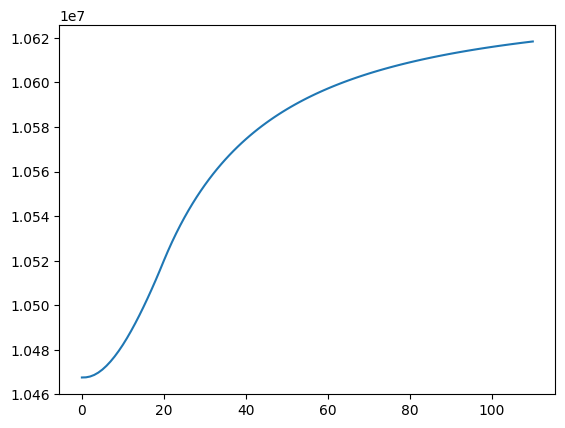

In [9]:
test2results.summary.V_cav.plot()

<Axes: xlabel='t_d'>

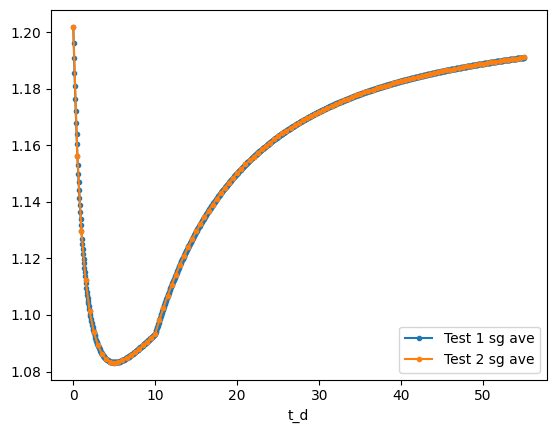

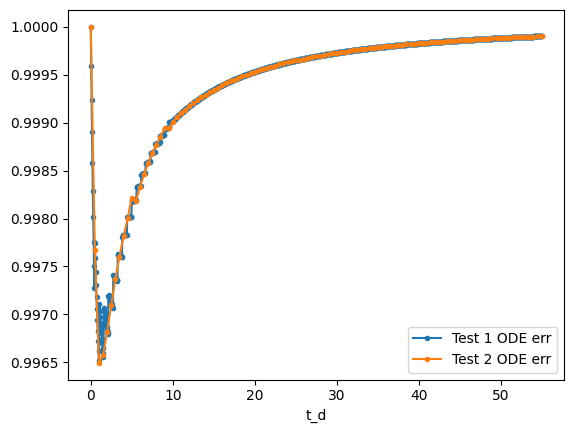

In [21]:
ax1 = test1results.summary.plot(y='sg_ave', x='t_d', label='Test 1 sg ave', marker='.')
ax2 = test1results.summary.plot(y='err_ode', x='t_d', label='Test 1 ODE err', marker='.')
test2results.summary.plot(ax=ax1, y='sg_ave', x='t_d', label='Test 2 sg ave', marker='.')
test2results.summary.plot(ax=ax2, y='err_ode', x='t_d', label='Test 2 ODE err', marker='.')

## Running from the command line
Jupyter is not a great way to demonstrate how to run sansmic from the command line; however, it is still possible to do so. The following code simulates the execution of the following command:

``sansmic old.dat -o cmdlineTest -v``

In [22]:
import sansmic.app
sansmic.app.main(['old.dat','-o','cmdlineTest','-v'])

INFO:sansmic:Successfully created scenario from old.dat


Output()

Running sansmic scenario: Converted from old.dat


Final results:
|   t_d |   stage |   z_obi |   h_insol |   V_inj |   V_fill |       V_cav |   sg_ave |
|------:|--------:|--------:|----------:|--------:|---------:|------------:|---------:|
|     0 |       0 | 4000    |   0       |   0     |        0 | 1.04675e+07 |  1.2019  |
|    55 |       1 | 3790.28 |   4.31774 |   1e+06 |  -984281 | 1.06184e+07 |  1.19104 |
         t_h    t_d    step  stage  phase  i_inj  i_prod  i_plume  i_obi  \
0        0.0   0.00       0      0      1      1       1        1      1   
1        1.2   0.05     119      1      1      1       5        4      5   
2        2.4   0.10     239      1      1      1       5        4      5   
3        3.6   0.15     359      1      1      1       5        4      5   
4        4.8   0.20     479      1      1      1       5        4      5   
...      ...    ...     ...    ...    ...    ...     ...      ...    ...   
1096  1315.2  54.80  131519      1      0      1      22       21     22   
1097  1316.4  54.85  1316